In [49]:
using CSV
using DataFrames
using FFTW
using Plots

In [50]:
function coordinates_to_angle(x1,y1,x2,y2)
    return atan(y2-y1,x2-x1)
end

coordinates_to_angle (generic function with 1 method)

In [51]:
coordinates_to_angle(0,0,1,-1)

-0.7853981633974483

In [52]:
# Define the grid dimensions and ranges
n = 330  # number of points along each axis
x_range = range(-22, 22, length=n)
y_range = range(-22, 22, length=n)

lambdaF = 1;

lambda=3*lambdaF;
p_F = 2*pi/lambdaF;

## The two impurities are at (a,0) and (-a,0)
a = 5*lambdaF;
r12 = 2*a;

dV=10^(-6);

In [53]:
cos(p_F*r12-pi/4)

0.7071067811865477

In [54]:
Delta = 10^(-3);
xi = 1/Delta;
T = 0.2*10^(-3);
dw = 2*pi*T;
wmax = 30*dw;
n_max = Int(round(wmax/dw));
wn_array = range(-wmax,wmax,n_max);
theta12 = 0;

In [55]:
n_max

30

In [56]:
function phi(r)
    return p_F*r - pi/4
end

phi (generic function with 1 method)

In [57]:
# Initialize the data container
results_hyperbola_only_high_temp = DataFrame(x=Float64[], y=Float64[], value=Float64[])
results_second_order_total_high_temp = DataFrame(x=Float64[], y=Float64[], value=Float64[])

# Compute the values of sin(r)/r
for x in x_range, y in y_range

    r23 = sqrt((x-a)^2 + (y)^2);
    r31 = sqrt((x+a)^2 + (y)^2);

    theta23 =coordinates_to_angle(a,0,x,y) 
    theta31 =coordinates_to_angle(x,y,-a,0) 

    Delta31 = Delta* cos(2*(theta31 + theta12));
    Delta23 = Delta* cos(2*(theta23 + theta12));
    Delta12 = Delta*cos(2*theta12);

    phi12 = phi(r12)
    phi23 = phi(r23)
    phi31 = phi(r31)
    value1 = 0;
    value2 = 0;
    value3 = 0;
    value4 = 0;

    # exp(-((r12 + r23 + r31)/xi)*sqrt(1 + wn_array[jj]^2/Delta^2))


    for jj = 1:n_max
        product_of_three = sqrt((wn_array[jj]^2 + Delta12^2)*(wn_array[jj]^2 + Delta23^2)*(wn_array[jj]^2 + Delta31^2))

        value1 += 2*sin(phi12) * sin(phi23 - phi31) * ((Delta23^2/(Delta23^2 + wn_array[jj]^2)^(3/2)) - (Delta31^2/(Delta31^2 + wn_array[jj]^2)^(3/2))) * exp(-(r12*sqrt(wn_array[jj]^2 + Delta12^2) + r23*sqrt(wn_array[jj]^2 + Delta23^2) + r31*sqrt(wn_array[jj]^2 + Delta31^2))) * dw /sqrt(sqrt(r12^2+lambda^2)*sqrt(r23^2+lambda^2)*sqrt(r31^2+lambda^2))

        value2 += 2*sin(phi12) * sin(phi23 + phi31) * ((Delta23^2/(Delta23^2 + wn_array[jj]^2)^(3/2)) + (Delta31^2/(Delta31^2 + wn_array[jj]^2)^(3/2))) * exp(-(r12*sqrt(wn_array[jj]^2 + Delta12^2) + r23*sqrt(wn_array[jj]^2 + Delta23^2) + r31*sqrt(wn_array[jj]^2 + Delta31^2))) * dw /sqrt(sqrt(r12^2+lambda^2)*sqrt(r23^2+lambda^2)*sqrt(r31^2+lambda^2))

        value3 += -2*cos(phi12) * cos(phi23 + phi31) * ((Delta12^2/(Delta12^2 + wn_array[jj]^2)^(3/2)) + ((Delta12^2/(Delta12^2 + wn_array[jj]^2)) + (Delta23^2/(Delta23^2 + wn_array[jj]^2)) + (Delta31^2/(Delta31^2 + wn_array[jj]^2)))*(wn_array[jj]^2/product_of_three) + (Delta12*(Delta23 + Delta31) - Delta23*Delta31)*(1/product_of_three)*(1 -(wn_array[jj]^2/(Delta12^2 + wn_array[jj]^2)) -(wn_array[jj]^2/(Delta23^2 + wn_array[jj]^2)) -(wn_array[jj]^2/(Delta31^2 + wn_array[jj]^2)))) * exp(-(r12*sqrt(wn_array[jj]^2 + Delta12^2) + r23*sqrt(wn_array[jj]^2 + Delta23^2) + r31*sqrt(wn_array[jj]^2 + Delta31^2))) * dw /sqrt(sqrt(r12^2+lambda^2)*sqrt(r23^2+lambda^2)*sqrt(r31^2+lambda^2))

        value4 += 2*cos(phi12) * cos(phi23 - phi31) * ((Delta12^2/(Delta12^2 + wn_array[jj]^2)^(3/2)) - ((Delta12^2/(Delta12^2 + wn_array[jj]^2)) + (Delta23^2/(Delta23^2 + wn_array[jj]^2)) + (Delta31^2/(Delta31^2 + wn_array[jj]^2)))*(wn_array[jj]^2/product_of_three) - (Delta12*(Delta23 + Delta31) - Delta23*Delta31)*(1/product_of_three)*(1 -(wn_array[jj]^2/(Delta12^2 + wn_array[jj]^2)) -(wn_array[jj]^2/(Delta23^2 + wn_array[jj]^2)) -(wn_array[jj]^2/(Delta31^2 + wn_array[jj]^2)))) * exp(-(r12*sqrt(wn_array[jj]^2 + Delta12^2) + r23*sqrt(wn_array[jj]^2 + Delta23^2) + r31*sqrt(wn_array[jj]^2 + Delta31^2))) * dw /sqrt(sqrt(r12^2+lambda^2)*sqrt(r23^2+lambda^2)*sqrt(r31^2+lambda^2))
    end
    value_hyperbola_only = value1 + value4
    push!(results_hyperbola_only_high_temp, (x, y, value_hyperbola_only))

    value_total = value1 + value2 + value3 + value4
    push!(results_second_order_total_high_temp, (x, y, value_total))
end

# Save the results to a CSV file
# CSV.write("d-wave-cuprate_hotspot_data_hyperbola.csv", results, writeheader=false)

In [61]:
results_hyperbola_only = DataFrame(
    x = results_hyperbola_only_low_temp.x,
    y = results_hyperbola_only_low_temp.y,
    value = results_hyperbola_only_high_temp.value .- results_hyperbola_only_low_temp.value
);

results_second_order_total = DataFrame(
    x = results_second_order_total_low_temp.x,
    y = results_second_order_total_low_temp.y,
    value = results_second_order_total_high_temp.value .- results_second_order_total_low_temp.value
);

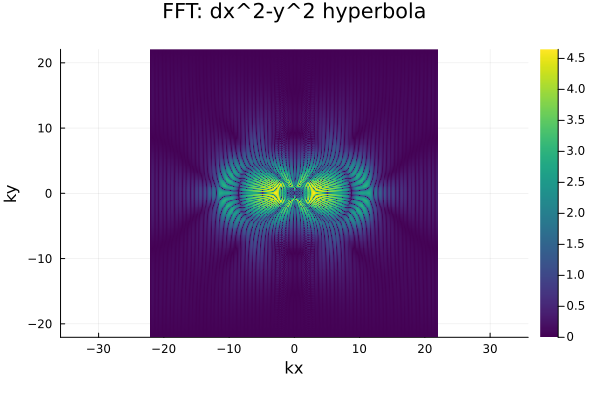

In [62]:
# Extract columns
x = results_hyperbola_only_high_temp.x
y = results_hyperbola_only_high_temp.y
data_hyperbola_only = results_hyperbola_only_high_temp.value

# Get unique x and y values
unique_x = unique(x)
unique_y = unique(y)

# Reshape data into a 2D array
data_2d_hyperbola_only = reshape(data_hyperbola_only, length(unique_y), length(unique_x))

# Step 2: Perform 2D Fourier Transform
ft_data_hyperbola_only = fft(data_2d_hyperbola_only)
ft_data_shifted_hyperbola_only = fftshift(ft_data_hyperbola_only)

# Compute magnitude and log scale for better visualization
ft_magnitude_hyperbola_only = abs.(ft_data_shifted_hyperbola_only)
ft_magnitude_log_hyperbola_only = log1p.(ft_magnitude_hyperbola_only)  # log(1 + magnitude) for stability

# Step 3: Plot the Fourier Transform
heatmap(
    unique_x, unique_y, ft_magnitude_log_hyperbola_only,
    color=:viridis,aspect_ratio=:equal,
    xlabel="kx", ylabel="ky",
    title="FFT: dx^2-y^2 hyperbola"
)

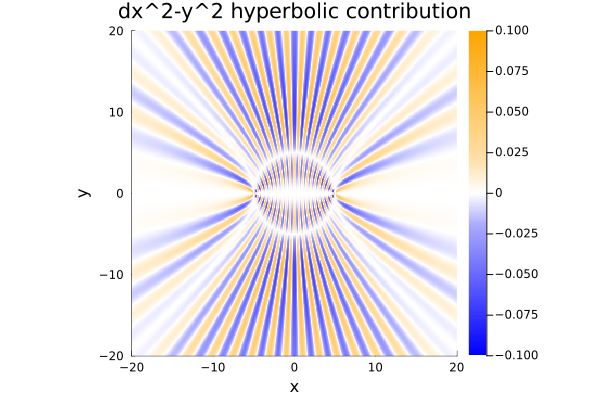

In [97]:
custom_cmap = cgrad([:blue, :white, :orange], [0.4, 0.6])  # Adjusting blend points
maxhere = 0.1

# Assuming `ft_data` is the Fourier transformed data from the previous step
# Step 1: Perform the Inverse Fourier Transform
data_reconstructed_hyperbola_only = ifft(ft_data_hyperbola_only)

# Convert to real values (discard negligible imaginary parts)
data_real_hyperbola_only = real(data_reconstructed_hyperbola_only)

# Step 2: Plot the reconstructed data in real space
heatmap(
    unique_x, unique_y, data_real_hyperbola_only,
    color=custom_cmap, aspect_ratio=:equal,
    xlabel="x", ylabel="y",
    clims=(-maxhere,maxhere),
    title="dx^2-y^2 hyperbolic contribution",
    xlims=(-20, 20),  # Set the x-axis limits
    ylims=(-20, 20)   # Set the y-axis limits
)

In [98]:
maximum(data_real_hyperbola_only)

0.0708613331986379

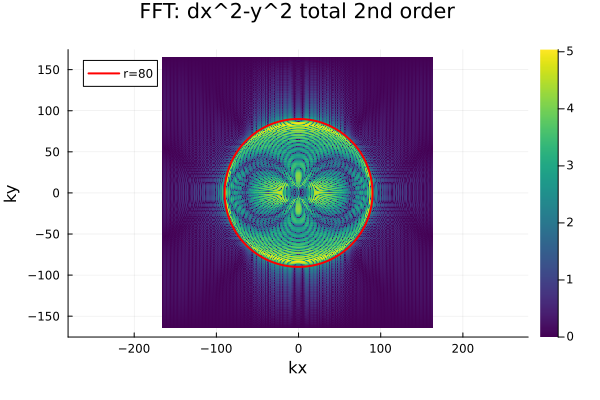

In [99]:
# Extract columns
x = results_second_order_total_high_temp.x
y = results_second_order_total_high_temp.y
data_second_order_total = results_second_order_total_high_temp.value

# Get unique x and y values
unique_x = unique(x)
unique_y = unique(y)

# Reshape data into a 2D array
data_2d_second_order_total = reshape(data_second_order_total, length(unique_y), length(unique_x))

# Step 2: Perform 2D Fourier Transform
ft_data_second_order_total = fft(data_2d_second_order_total)
ft_data_shifted_second_order_total = fftshift(ft_data_second_order_total)

# Compute magnitude and log scale for better visualization
ft_magnitude_second_order_total = abs.(ft_data_shifted_second_order_total)
ft_magnitude_log_second_order_total = log1p.(ft_magnitude_second_order_total)  # log(1 + magnitude) for stability

# Step 3: Plot the Fourier Transform
heatmap(
    kx_grid, ky_grid, ft_magnitude_log_second_order_total,
    color=:viridis,aspect_ratio=:equal,
    xlabel="kx", ylabel="ky",
    title="FFT: dx^2-y^2 total 2nd order"
)

# Overlay a ring at radius = 80
θ = range(0, 2π, length=500)
ring_radius = 90
plot!(
    ring_radius * cos.(θ),
    ring_radius * sin.(θ),
    color=:red, linewidth=2, label="r=80"
)

In [100]:
maximum(data_2d_second_order_total)

0.1872934390395441

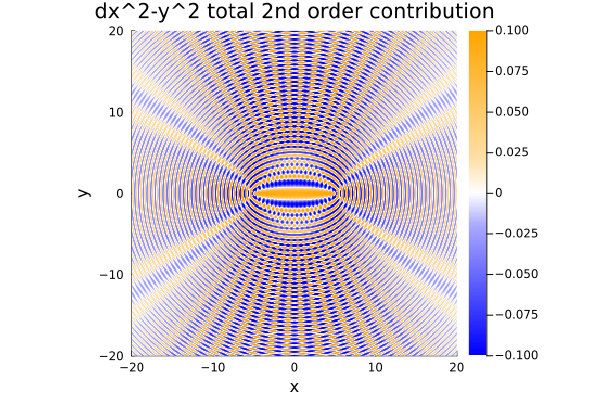

In [101]:
custom_cmap = cgrad([:blue, :white, :orange], [0.4, 0.6])  # Adjusting blend points

heatmap(
    unique_x, unique_y, data_2d_second_order_total,
    color=custom_cmap, aspect_ratio=:equal,
    xlabel="x", ylabel="y",
    clims=(-maxhere,maxhere),
    title="dx^2-y^2 total 2nd order contribution",
    xlims=(-20, 20),  # Set the x-axis limits
    ylims=(-20, 20)   # Set the y-axis limits
)

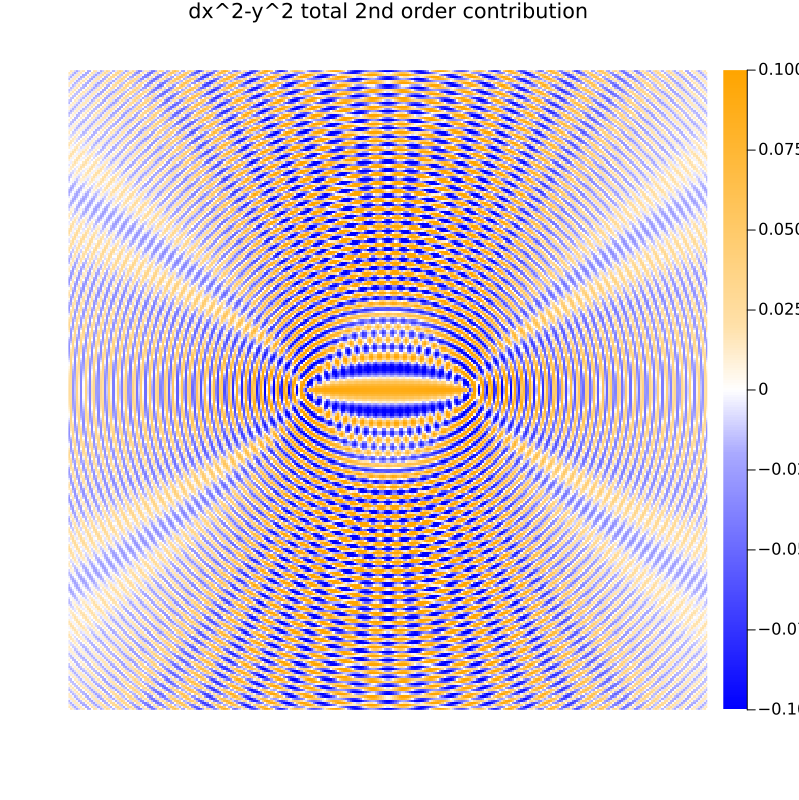

In [108]:
custom_cmap = cgrad([:blue, :white, :orange], [0.4, 0.6])  # Adjusting blend points

heatmap(
    unique_x, unique_y, data_2d_second_order_total,
    color=custom_cmap, aspect_ratio=:equal,
    xlabel="x", ylabel="y",
    clims=(-maxhere,maxhere),
    title="dx^2-y^2 total 2nd order contribution",
    framestyle=:none,  # Remove axis lines and frame
    xlims=(-20, 20),  # Set the x-axis limits
    ylims=(-20, 20),   # Set the y-axis limits
    size=(800, 800),  # Set the size of the plot
)

In [103]:
round(601/2)

300.0

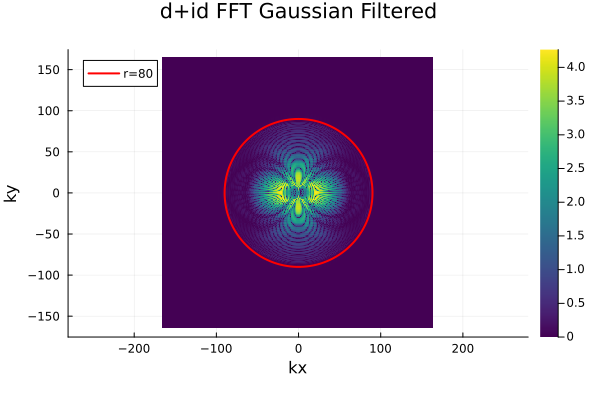

In [104]:
# Assuming `ft_data_shifted` is the shifted Fourier-transformed data and `unique_x`, `unique_y` are grid axes
# Step 1: Define the grid for Fourier space
nx, ny = size(ft_data_shifted_second_order_total)

if nx % 2 == 0
    kx = -nx÷2:nx÷2-1
else
    kx = -(nx-1)÷2:(nx-1)÷2
end
if ny % 2 == 0
    ky = -ny÷2:ny÷2-1
else
    ky = -(ny-1)÷2:(ny-1)÷2
end


# Create a grid for Fourier space
kx_grid, ky_grid = [k for k in kx], [k for k in ky]
kx_matrix = repeat(kx_grid', ny, 1)
ky_matrix = repeat(ky_grid, 1, nx)

# Step 2: Define the Gaussian mask
radius = 50.0  # Adjust the radius /for the Gaussian mask
sigma = radius / 2.0  # Standard deviation of the Gaussian
gaussian_mask = exp.(-(kx_matrix.^2 .+ ky_matrix.^2) / (2 * sigma^2))

# Step 3: Define the center removal mask
center_radius = 300.0  # Radius of the central region to remove
center_mask = ones(size(gaussian_mask)) - exp.(-(40*(kx_matrix.^2) .+ (ky_matrix/20).^2) / (2 * (center_radius)^2))

# Step 4: Combine the Gaussian mask and the center removal mask
combined_mask = gaussian_mask .* center_mask  # Element-wise multiplication

# Step 5: Apply the combined mask to the shifted Fourier transform
ft_data_shifted_filtered = ft_data_shifted_second_order_total .* gaussian_mask

# Step 6: Visualize the filtered data
heatmap(
    kx_grid, ky_grid, log1p.(abs.(ft_data_shifted_filtered)),
    color=:viridis, aspect_ratio=:equal,
    xlabel="kx", ylabel="ky",
    title="d+id FFT Gaussian Filtered"
)

# Overlay a ring at radius = 80
θ = range(0, 2π, length=500)
ring_radius = 90
plot!(
    ring_radius * cos.(θ),
    ring_radius * sin.(θ),
    color=:red, linewidth=2, label="r=80"
)

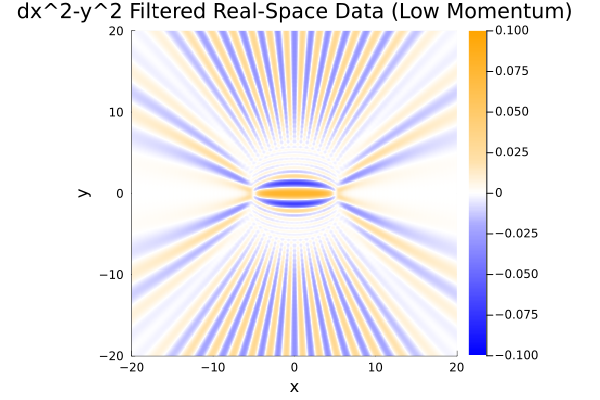

In [105]:
ft_data_filtered = fftshift(ft_data_shifted_filtered)

filtered_data = ifft(ft_data_filtered)
filtered_data_real = real(filtered_data)

# Custom colormap: Blue for negative, White for zero, Orange for positive
custom_cmap = cgrad([:blue, :white, :orange], [0.4, 0.6])  # Adjusting blend points

# Generate the heatmap

heatmap(
    unique_x, unique_y, filtered_data_real,
    color=custom_cmap, aspect_ratio=:equal,
    xlabel="x", ylabel="y",
    xlims=(-20, 20),  # Set the x-axis limits
    ylims=(-20, 20),   # Set the y-axis limits
    clims=(-maxhere,maxhere),
    title="dx^2-y^2 Filtered Real-Space Data (Low Momentum)"
)

In [106]:
maximum(abs.(filtered_data_real))

0.07909015282244697

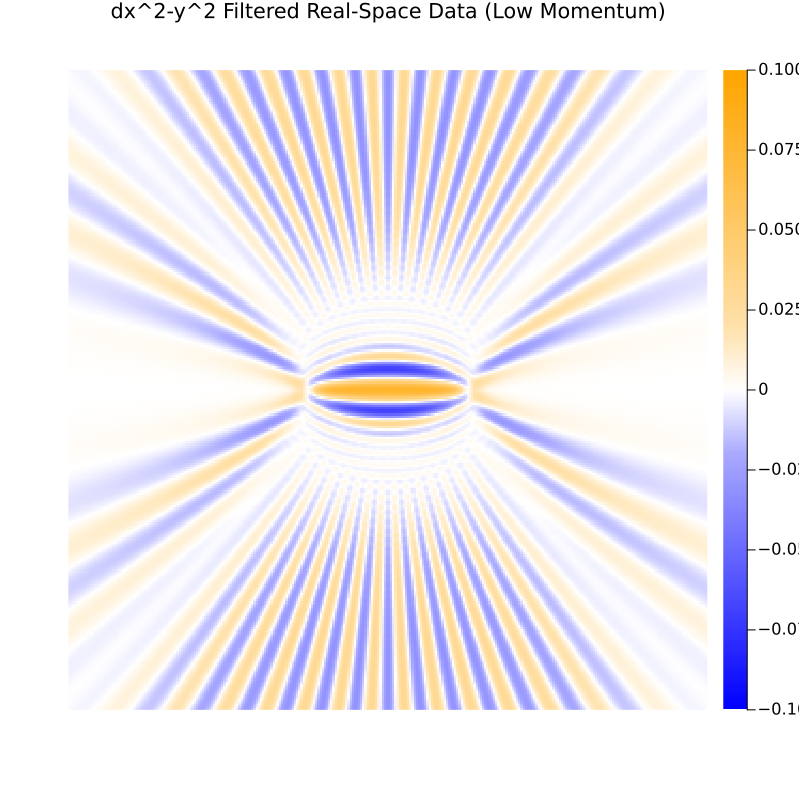

In [109]:
heatmap(
    unique_x, unique_y, filtered_data_real,
    color=custom_cmap, aspect_ratio=:equal,
    xlabel="x", ylabel="y",
    xlims=(-20, 20),  # Set the x-axis limits
    ylims=(-20, 20),   # Set the y-axis limits
    framestyle=:none,  # Remove axis lines and frame
    clims=(-maxhere,maxhere),
    size=(800, 800),  # Set the size of the plot
    title="dx^2-y^2 Filtered Real-Space Data (Low Momentum)"
)